# Lecture 3 Notes
## Monday, April 6, 2020
Annie Bryan

### Pseudo-Random Numbers

In [5]:
# generates a number distributed uniformly between 0 and 1
for _ in 1:10
    x = rand()
    @show x
end

x = 0.34098270313733936
x = 0.48370708908378157
x = 0.5828955720593303
x = 0.5498216259831454
x = 0.17863735653297508
x = 0.29669952640399244
x = 0.8527432699290018
x = 0.6678215402981564
x = 0.5236774357418823
x = 0.5205433288324102


In [7]:
# generate an event with probability 1/2
for _ in 1:10
    x = rand()
    @show x < 0.5
end

x < 0.5 = true
x < 0.5 = true
x < 0.5 = true
x < 0.5 = true
x < 0.5 = true
x < 0.5 = false
x < 0.5 = true
x < 0.5 = false
x < 0.5 = false
x < 0.5 = true


### Modeling the recovery process using probability

In [10]:
function run_infection(I₀, λ, T=20)
    I = zeros(T)
    I[1] = I₀
    
    for n in 2:T
        I[n] = λ * I[n-1]
    end
    
    return I
end

run_infection (generic function with 2 methods)

In [16]:
run_infection(1.0, 1.1)

20-element Array{Float64,1}:
 1.0
 1.1
 1.2100000000000002
 1.3310000000000004
 1.4641000000000006
 1.6105100000000008
 1.771561000000001
 1.9487171000000014
 2.1435888100000016
 2.357947691000002
 2.5937424601000023
 2.853116706110003
 3.1384283767210035
 3.4522712143931042
 3.797498335832415
 4.177248169415656
 4.594972986357222
 5.054470284992944
 5.559917313492239
 6.115909044841463

### Adding new data to extend a vector

In [14]:
function run_infection(I₀, λ, T=20)
    I = [I₀]
    
    for n in 2:T
        push!(I, I[length(I)]*λ)
    end
    
    return I
end

run_infection (generic function with 2 methods)

In [17]:
run_infection(1.0, 1.1)

20-element Array{Float64,1}:
 1.0
 1.1
 1.2100000000000002
 1.3310000000000004
 1.4641000000000006
 1.6105100000000008
 1.771561000000001
 1.9487171000000014
 2.1435888100000016
 2.357947691000002
 2.5937424601000023
 2.853116706110003
 3.1384283767210035
 3.4522712143931042
 3.797498335832415
 4.177248169415656
 4.594972986357222
 5.054470284992944
 5.559917313492239
 6.115909044841463

### Stochastic Randomness

In [18]:
using Random

In [20]:
# mechanism to get repeatable sequences of random numbers
Random.seed!(3);

In [21]:
r = rand()

0.8116984049958615

In [22]:
Random.seed!(3);
r = rand()

0.8116984049958615

In [23]:
rand(10)

10-element Array{Float64,1}:
 0.9884323655013432
 0.8076220876500786
 0.9700908450487538
 0.14006111319509862
 0.5094438024440222
 0.05869740597593154
 0.004257960600515309
 0.9746379934512355
 0.5572251384524507
 0.4644219211852372

In [25]:
using Plots

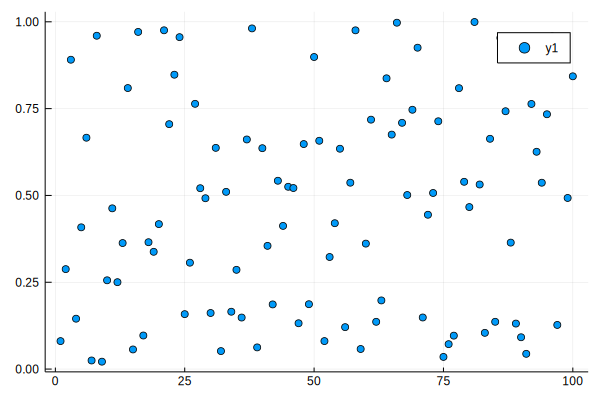

In [30]:
r = rand(100)
scatter(r)

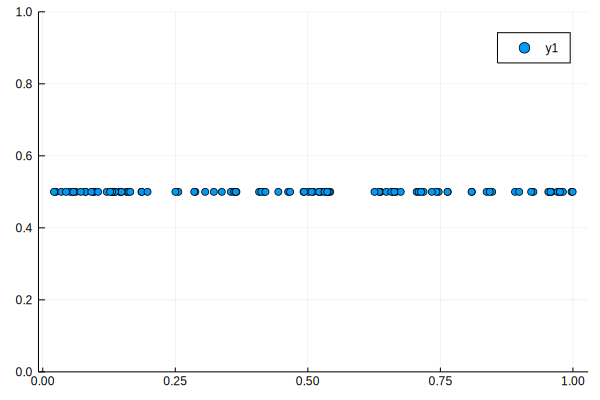

In [31]:
scatter(r, 0.5 .* one.(r), ylim=(0,1))

In [34]:
using Interact

num_pts = 100
pts = rand(num_pts)
@manipulate for n in 1:num_pts
    scatter(r[1:n], 0.5.*one.(pts[1:n]), ylim=(0,1), xlim=(0,1))
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["n"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 100,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Int64} with 2 listeners. Value:
50, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/Users/anniebryan/.julia/packages/Knockout/IP1uR/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/anniebryan/.julia/packages/Knockout/IP1uR/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/anniebryan/.julia/packages/InteractBase/9mFwe/src/../assets/all.js"), Asset("css", nothing, "/Users/anniebryan/.julia/packages/InteractBase/9mFwe/src/../assets/style.css"), Asset("css", nothing, "/Users/anniebryan/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x0000000130387190, Task (runnable) @0x0000000130387190), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\"24\",\"25\",\"26\",\"27\",\"28\",\"29\",\"30\",\"31\",\"32\",\"33\",

### Event with probability $p$

In [35]:
p = 0.25
r = rand()

r < p

false

In [36]:
function bernoulli(p)
    r = rand()
    return r < p
end

bernoulli (generic function with 1 method)

In [37]:
trials = [bernoulli(p) for _ in 1:100];
count(trials)

21

In [44]:
function experiment(p, N=100)
    trials = [bernoulli(p) for _ in 1:N]
    return count(trials)
end

experiment (generic function with 2 methods)

### Monte Carlo Simulation
Run the same random process a lot of times and look at the results

In [52]:
function monte_carlo(p, N=100, num_experiments=100)
    counts = [experiment(p,N) for _ in 1:num_experiments]
    return counts
end

monte_carlo (generic function with 3 methods)

In [60]:
counts = monte_carlo(0.25, 100, 1000)
@show minimum(counts)
@show maximum(counts)
@show sum(counts)/length(counts)

minimum(counts) = 12
maximum(counts) = 38
sum(counts) / length(counts) = 24.795


24.795

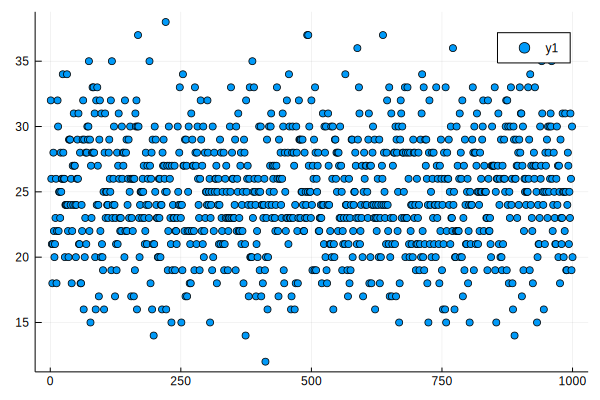

In [61]:
scatter(counts)

**Probability distribution** of a random variable $X$

$P_X(x) = P(X=x)$

In [94]:
results = zeros(100)
for i in 1:100
    results[i] = sum([j==i for j in counts])
end
replace!(results, 0=>NaN)

100-element Array{Float64,1}:
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
   1.0
 NaN
   ⋮
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN

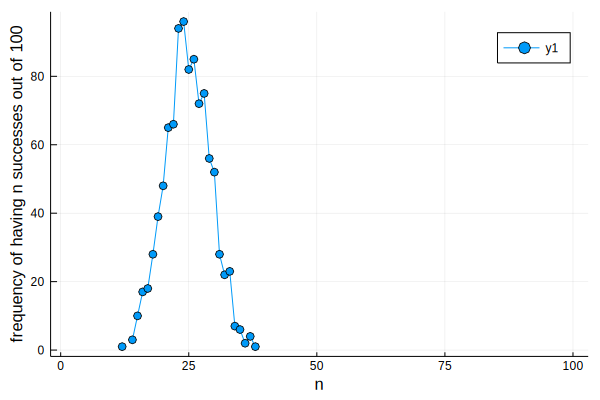

In [103]:
plot(results, m=:o)
xlabel!("n")
ylabel!("frequency of having n successes out of 100")

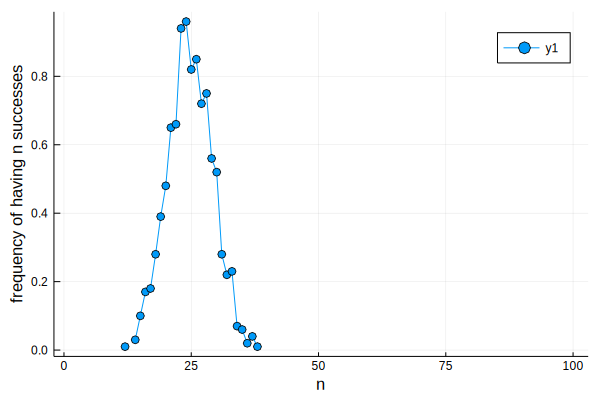

In [109]:
plot(results./100, m=:o)
xlabel!("n")
ylabel!("frequency of having n successes")